# Cuaterniones y Rotaciones 3D
## Primera entrega AB Unit 34

Alumno: Javier Ruiz

Fecha: 26/02/25

## Introducción

Los números complejos y sus extensiones, como los cuaterniones, son herramientas matemáticas fundamentales en campos como la física, ingenería y computación grafica 

Los números complejos, expresados en su forma polar $z = r(\cos \theta + i\cdot\sin \theta)$ o en su forma exponencial $z = r\cdot e^{i\theta}$, permiten operaciones como la multiplicación y la potenciació  de forma elegante, interpretando estas operaciones como transformaciones geométricas en el plano.

Los cuaterniones, descubiertos por Hamilton en 1843, extienden esta idea al espacio tridimensional, proporcionando una representación matemática eficiente para rotaciones 3D. Un cuaternión se expresa de la siguiente forma:

$$q = w + xi + yj + zk$$

Donde $w$ es la parte escalar y $(x,y,z)$ la parte vectorial. Los cuaterniones unitarios (de norma 1) representan el espacio 3D y ofrecen ventajas significativas sobre otros métodos como las matrices de rotación o ángulos de Euler.
 
En este trabajo, exploraremos cómo los cuaterniones permiten realizar rotaciones e interpolaciones en el espacio tridimensional, analizando en particular la importancia de la interpolación esférica (SLERP) para obtener animaciones suaves y naturales en aplicaciones de gráficos por computadora.

# 1. Fundamentos Teóricos 

## ¿Qué es un cuaternión?

Un cuaternión es una extensión de los números complejos y se expresa como: 

    q = w + xi + yj + zk

donde w es la parte real y (x, y, z) constituyen la parte imaginaria. Los cuaterniones tienen propiedades algebraicas muy útiles para representar rotaciones en 3D. En particular:

- Multiplicación no conmutativa: El producto de cuaterniones no es conmutativo, lo que refleja la naturaleza de las rotaciones en el espacio.

- Conjugado e Inverso: Para un cuaternión q, el conjugado es q* = w − xi − yj − zk. Si q es unitario (|q| = 1), entonces q⁻¹ = q*. Esto es fundamental, ya que para rotar un vector v en 3D se usa la fórmula:
         
     v' = q · (0, v) · q⁻¹

     donde (0, v) es el cuaternión puro que representa al vector.
    
 **Representación de una Rotación:**
    Para rotar un vector v alrededor de un eje unitario u = (u_x, u_y, u_z) por un ángulo θ, el cuaternión de rotación se define como:

     q = [cos(θ/2), sin(θ/2)·u_x, sin(θ/2)·u_y, sin(θ/2)·u_z]

La ventaja de usar cuaterniones es que evitan problemas comunes de otros métodos, como el gimbal lock, y permiten una interpolación suave (SLERP) entre rotaciones.

"""
## Forma Polar de Números Complejos y su Relación con Cuaterniones

Los números complejos pueden representarse en forma polar como:

$$z = r(\cos \theta + i\cdot\sin \theta) = r\cdot e^{i\theta}$$

donde $r$ es el módulo y $\theta$ es el argumento. Esta representación facilita operaciones como:

- Multiplicación: $z_1\cdot z_2 = r_1 r_2\cdot e^{i(\theta_1+\theta_2)}$
- División: $z_1/z_2 = (r_1/r_2)\cdot e^{i(\theta_1-\theta_2)}$
- Potenciación: $z^n = r^n\cdot e^{in\theta}$

Geométricamente, multiplicar por un número complejo de módulo 1 equivale a una rotación en el plano complejo.

Los cuaterniones extienden este concepto al espacio 3D. Un cuaternión unitario puede expresarse en forma exponencial como:

$$q = \cos(\theta/2) + \vec{u}\sin(\theta/2)$$

donde $\vec{u}$ es un vector unitario que representa el eje de rotación y $\theta$ es el ángulo de rotación. Esta forma es análoga a la forma exponencial de los números complejos $e^{i\theta}$, y permite interpretar los cuaterniones como rotaciones en el espacio tridimensional.

## Interpolación de Cuaterniones y SLERP

Para animaciones suaves en gráficos 3D, necesitamos interpolar entre rotaciones. Existen dos enfoques principales:

1. **Interpolación Lineal (LERP)**: Consiste en interpolar linealmente entre dos cuaterniones y normalizar el resultado:
   
   $$q(t) = \frac{(1-t)q_1 + tq_2}{|(1-t)q_1 + tq_2|}$$
   
   Esta aproximación es computacionalmente eficiente pero produce rotaciones con velocidad no uniforme.

2. **Interpolación Esférica Lineal (SLERP)**: Produce rotaciones con velocidad angular constante:
   
   $$q(t) = q_1(q_1^{-1}q_2)^t$$
   
   Que puede calcularse como:
   
   $$q(t) = \frac{\sin((1-t)\theta)}{\sin(\theta)}q_1 + \frac{\sin(t\theta)}{\sin(\theta)}q_2$$
   
   Donde $\theta$ es el ángulo entre $q_1$ y $q_2$.

SLERP es crucial en animaciones 3D porque:

- Mantiene velocidad angular constante durante la rotación
- Sigue el camino más corto en la hipersuperficie unitaria (una geodésica)
- Produce movimientos que parecen naturales al ojo humano

Sin SLERP, las animaciones podrían parecer "acelerar" o "desacelerar" durante las transiciones, lo que rompe la ilusión de movimiento natural en aplicaciones como videojuegos, simuladores y animaciones 3D.
"""



## Ángulos de Euler para la Descripción de Rotaciones en 3D

Los ángulos de Euler describen la orientación de un objeto en el espacio tridimensional mediante tres rotaciones sucesivas. Utilizando la convención intrínseca **ZYX**, se realizan las siguientes rotaciones:

1. Rotación en torno al eje Z (Yaw)

    Se gira el objeto en el plano XY según el ángulo $\psi$. La matriz de rotación es:

    $$
    R_z(\psi) =
    \begin{pmatrix}
    \cos\psi & -\sin\psi & 0 \\
    \sin\psi & \cos\psi  & 0 \\
    0        & 0         & 1
    \end{pmatrix}
    $$

2. Rotación en torno al eje Y (Pitch)

    Luego se rota el objeto respecto al eje Y mediante el ángulo $\theta$, inclinando el objeto hacia arriba o hacia abajo. La matriz de rotación es:
    
    $$
    R_y(\theta) =
    \begin{pmatrix}
    \cos\theta & 0 & \sin\theta \\
    0          & 1 & 0 \\
    -\sin\theta& 0 & \cos\theta
    \end{pmatrix}
    $$

3. Rotación en torno al eje X (Roll)

    Finalmente, se rota el objeto en torno al eje X mediante el ángulo $\phi$, lo que produce una inclinación lateral. La matriz de rotación es:

    $$
    R_x(\phi) =
    \begin{pmatrix}
    1 & 0         & 0 \\
    0 & \cos\phi & -\sin\phi \\
    0 & \sin\phi & \cos\phi
    \end{pmatrix}
    $$

Matriz de Rotación Total

La orientación final se obtiene al multiplicar las matrices en el siguiente orden:

$$
R = R_z(\psi) \cdot R_y(\theta) \cdot R_x(\phi)
$$




## 2. Ejemplo en Python

**Uso de Cuaterniones  y Matrices de rotación para Rotaciones 3D**

In [14]:
# Librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.spatial.transform import Rotation as R
from ipywidgets import interact

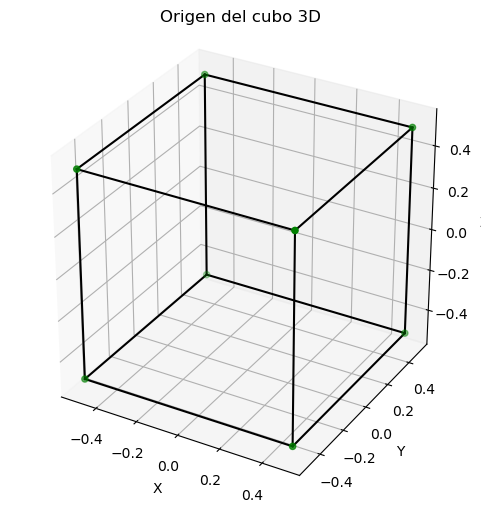

In [15]:
def generate_cube(size=1.0):
    d = size / 2.0

    vertices = np.array([
        [-d, -d, -d],
        [+d, -d, -d],
        [+d, +d, -d],
        [-d, +d, -d],
        [-d, -d, +d],
        [+d, -d, +d],
        [+d, +d, +d],
        [-d, +d, +d]
    ])
    return vertices

# Visualización básica del cubo
cube_vertices = generate_cube()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cube_vertices[:, 0], cube_vertices[:, 1], cube_vertices[:, 2], c='green')

# Conectar los vertices para formar los bordes de el cubo
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),
    (4, 5), (5, 6), (6, 7), (7, 4),
    (0, 4), (1, 5), (2, 6), (3, 7)
]

for start, end in edges:
    ax.plot(
        [cube_vertices[start, 0], cube_vertices[end, 0]],
        [cube_vertices[start, 1], cube_vertices[end, 1]],
        [cube_vertices[start, 2], cube_vertices[end, 2]], 
        color='black'
    )

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Origen del cubo 3D')
ax.set_box_aspect([1, 1, 1])
plt.show()

Manejo cuaterniones

In [16]:
# Función para normalizar un vector
def normalize(v):
    return v / np.linalg.norm(v)

# Producto de cuaterniones: q1 * q2
def quaternion_multiply(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    return np.array([
        w1*w2 - x1*x2 - y1*y2 - z1*z2,
        w1*x2 + x1*w2 + y1*z2 - z1*y2,
        w1*y2 - x1*z2 + y1*w2 + z1*x2,
        w1*z2 + x1*y2 - y1*x2 + z1*w2
    ])

# Rota un punto 3D usando un cuaternión unitario
def rotate_point_by_quaternion(p, q):
    q_conj = np.array([q[0], -q[1], -q[2], -q[3]])  # conjugado
    p_quat = np.array([0] + list(p))  # vector como cuaternión puro
    return quaternion_multiply(quaternion_multiply(q, p_quat), q_conj)[1:]

# Interpolación lineal (LERP)
def lerp(q1, q2, t):
    q = (1 - t) * q1 + t * q2
    return normalize(q)

# Interpolación esférica (SLERP)
def slerp(q1, q2, t):
    dot = np.dot(q1, q2)
    if dot < 0.0:
        q2 = -q2
        dot = -dot
    if dot > 0.9995:
        return normalize(lerp(q1, q2, t))
    theta_0 = np.arccos(dot)
    theta = theta_0 * t
    q3 = normalize(q2 - q1 * dot)
    return np.cos(theta) * q1 + np.sin(theta) * q3


Rotar cubo

## Interpolación de cuaterniones: LERP vs SLERP

### ¿Por qué necesitamos SLERP?

La interpolación lineal (LERP) entre cuaterniones es computacionalmente eficiente pero tiene un problema fundamental: no preserva una velocidad angular constante durante la rotación. Esto se debe a que los cuaterniones unitarios forman una esfera en un espacio 4D, y la interpolación lineal corta a través de esta esfera en lugar de seguir su superficie.

Cuando aplicamos LERP a cuaterniones, ocurren dos problemas:

1. **No se mantiene la norma unitaria** - Los cuaterniones intermedios no son unitarios, lo que requiere normalización en cada paso.
2. **Velocidad angular no constante** - La rotación resultante acelera y decelera de forma no natural durante la transición.

### Interpolación esférica (SLERP)

SLERP (Spherical Linear Interpolation) resuelve estos problemas interpolando a lo largo del arco esférico que conecta los dos cuaterniones en la hiperesfera 4D. Matemáticamente, SLERP se define como:

SLERP(q1, q2, t) = q1(sin((1-t)θ)/sin(θ)) + q2(sin(tθ)/sin(θ))

Donde θ es el ángulo entre los cuaterniones q1 y q2, y t es el parámetro de interpolación (entre 0 y 1).

Las ventajas principales de SLERP son:

1. **Velocidad angular constante** - La rotación ocurre a un ritmo constante.
2. **Camino más corto** - Siempre sigue el arco más corto entre las dos orientaciones.
3. **Preserva la norma unitaria** - Los cuaterniones interpolados tienen norma unitaria.


In [17]:

# Funciones de cuaterniones
def normalize(v):
    return v / np.linalg.norm(v)

def quaternion_multiply(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    return np.array([
        w1*w2 - x1*x2 - y1*y2 - z1*z2,
        w1*x2 + x1*w2 + y1*z2 - z1*y2,
        w1*y2 - x1*z2 + y1*w2 + z1*x2,
        w1*z2 + x1*y2 - y1*x2 + z1*w2
    ])

def rotate_point_by_quaternion(p, q):
    p_q = np.array([0, *p])
    q_conj = np.array([q[0], -q[1], -q[2], -q[3]])
    rotated = quaternion_multiply(quaternion_multiply(q, p_q), q_conj)
    return rotated[1:]

def lerp(q1, q2, t):
    q = (1 - t) * q1 + t * q2
    return normalize(q)

def slerp(q1, q2, t):
    dot = np.dot(q1, q2)
    if dot < 0.0:
        q2 = -q2
        dot = -dot
    if dot > 0.9995:
        return lerp(q1, q2, t)
    theta_0 = np.arccos(dot)
    theta = theta_0 * t
    q3 = normalize(q2 - q1 * dot)
    return np.cos(theta) * q1 + np.sin(theta) * q3

# Vertices del cubo centrado en el origen
vertices = np.array([
    [-1, -1, -1], [1, -1, -1],
    [1, 1, -1], [-1, 1, -1],
    [-1, -1, 1], [1, -1, 1],
    [1, 1, 1], [-1, 1, 1]
])
edges = [(0,1), (1,2), (2,3), (3,0),
         (4,5), (5,6), (6,7), (7,4),
         (0,4), (1,5), (2,6), (3,7)]

# Cuaterniones
q_start = np.array([1, 0, 0, 0])  # identidad
axis = normalize(np.array([1, 1, 1]))
theta = np.pi / 2  # 90 grados
q_end = normalize(np.concatenate(([np.cos(theta/2)], np.sin(theta/2) * axis)))

# Interpolaciones completas (t = 1)
q_lerp = lerp(q_start, q_end, 1.0)
q_slerp = slerp(q_start, q_end, 1.0)

# Rotar cubo con LERP y SLERP
vertices_lerp = np.array([rotate_point_by_quaternion(v, q_lerp) for v in vertices])
vertices_slerp = np.array([rotate_point_by_quaternion(v, q_slerp) for v in vertices])


# Setup del gráfico
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.set_title("Rotación de un cubo 3D usando SLERP")
#ax.set_xlim([-2, 2])
#ax.set_ylim([-2, 2])
#ax.set_zlim([-2, 2])
#lines = [ax.plot([], [], [], color="blue")[0] for _ in edges]

#def init():
#    for line in lines:
#        line.set_data([], [])
#        line.set_3d_properties([])
#    return lines

#def update(frame):
 #   t = frame / 60  # Normalizar a rango [0, 1]
 #   q_interp = slerp(q_start, q_end, t)
 #   rotated = np.array([rotate_point_by_quaternion(v, q_interp) for v in vertices])
 #   for i, edge in enumerate(edges):
 #       p1, p2 = rotated[edge[0]], rotated[edge[1]]
  #      lines[i].set_data([p1[0], p2[0]], [p1[1], p2[1]])
 ##       lines[i].set_3d_properties([p1[2], p2[2]])
  #  return lines

#ani = FuncAnimation(fig, update, frames=61, init_func=init, blit=True)

# Guardar como GIF
#ani.save("rotacion_slerp.gif", writer=PillowWriter(fps=15))

# Setup del gráfico
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.set_title("Rotación de un cubo 3D usando LERP")
#ax.set_xlim([-2, 2])
#ax.set_ylim([-2, 2])
#ax.set_zlim([-2, 2])
#lines = [ax.plot([], [], [], color="red")[0] for _ in edges]

#def init():
#    for line in lines:
#        line.set_data([], [])
#        line.set_3d_properties([])
#    return lines#

#def update(frame):
#    t = frame / 60  # Normalizar a rango [0, 1]
#    q_interp = lerp(q_start, q_end, t)
#    rotated = np.array([rotate_point_by_quaternion(v, q_interp) for v in vertices])
#    for i, edge in enumerate(edges):
#        p1, p2 = rotated[edge[0]], rotated[edge[1]]
#        lines[i].set_data([p1[0], p2[0]], [p1[1], p2[1]])
#        lines[i].set_3d_properties([p1[2], p2[2]])
#    return lines


#ani = FuncAnimation(fig, update, frames=61, init_func=init, blit=True)

# Guardar como GIF
#ani.save("rotacion_lerp.gif", writer=PillowWriter(fps=15))



<img src="rotacion_lerp.gif">
<img src="rotacion_slerp.gif">

## Matrices de rotación para rotaciones 3D

### Fundamentos matemáticos

Las rotaciones en espacios tridimensionales se pueden representar mediante matrices de rotación. Estas matrices son elementos del grupo ortogonal $SO(3)$, lo que siginifica que son matrices $3\times 3$ con determinate 1 y que satisfacen la propiedad $R^T R = I$ (ortogonalidad)

### Rotaciones elementales

Las rotaciones elementales se realizan al rededor de los ejes coordenados principales: 

**Rotación alrededor del eje X**

$$
R_x(\theta) =
\begin{pmatrix}
1 & 0 & 0 \\
0 & \cos\theta & -\sin\theta \\
0 & \sin\theta & \cos\theta
\end{pmatrix}
$$

**Rotación alrededor del eje Y**

$$
R_y(\theta) =
\begin{pmatrix}
\cos\theta & 0 & \sin\theta \\
0 & 1 & 0 \\
-\sin\theta & 0 & \cos\theta
\end{pmatrix}
$$

**Rotación alrededor del eje Z**

$$
R_z(\theta) =
\begin{pmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

### Aplicación de rotaciones

Para rotar un punto $P = (x,y,z)$ utilizando una matriz de rotación $R$, se multiplica el vector por la matriz:

$$
P' = R \cdot P
$$

Donde $P´$ es el punto después de la rotación

### Composición de rotaciones

Para aplicar múltiples rotaciones sucesivas, se multiplican las matrices de rotación correspondientes:

$$
R_{\text{total}} = R_n \cdot R_{n-1} \cdot \dots \cdot R_2 \cdot R_1
$$


**Importante:** El orden de multiplicación es de derecha a izquierda ya que la multiplicación de matrices no es conmutativa

### Rotación alrededor de un Eje Arbitrario

Para rotar alredeor de un eje arbitrario definido por un vector unitario $\hat{u} = (u_x, u_y, u_z)$ con ángulo $\theta$, se utiliza la fórmula de Rodrigues:

$$
R(\hat{u}, \theta) = \cos\theta\, I + \sin\theta\,[u]_{\times} + (1 - \cos\theta)(\hat{u} \otimes \hat{u})
$$

Donde:
    
- $[u]_{\times}$ es la matriz antisimetrica asociada a $\hat{u}$

$$
[u]_{\times} =
\begin{pmatrix}
0 & -u_z & u_y \\
u_z & 0 & -u_x \\
-u_y & u_x & 0
\end{pmatrix}
$$

- $\hat{u} \otimes \hat{u}$ es el producto exterior:

$$
\hat{u} \otimes \hat{u} =
\begin{pmatrix}
u_x^2 & u_x u_y & u_x u_z \\
u_x u_y & u_y^2 & u_y u_z \\
u_x u_z & u_y u_z & u_z^2
\end{pmatrix}
$$

### Propiedades importantes

1. Ortogonalidad: $R^T R = R R^T = I$
2. Preservación de la norma: $|R \cdot v| = |v|$
3. Preservación del producto escalar: $(R \cdot u) \cdot (R \cdot v) = u \cdot v$
4. Determinante: $\det(R) = 1$

### Aplicaciones Prácticas

Las matrices de rotación son fundamentales en:

- Gráficos por computadora
- Robótica
- Sistemas de navegación
- Mecánica espacial
- Visión por computadora

In [18]:
# === 1. Crear vértices y aristas del cubo ===
cubo_vertices = np.array([
    [-1, -1, -1],
    [ 1, -1, -1],
    [ 1,  1, -1],
    [-1,  1, -1],
    [-1, -1,  1],
    [ 1, -1,  1],
    [ 1,  1,  1],
    [-1,  1,  1]
])

cubo_aristas = [
    (0,1), (1,2), (2,3), (3,0),  # abajo
    (4,5), (5,6), (6,7), (7,4),  # arriba
    (0,4), (1,5), (2,6), (3,7)   # verticales
]

# === 2. Definir funciones de rotación ===
def rot_x(angle):
    rad = np.deg2rad(angle)
    return np.array([
        [1, 0, 0],
        [0, np.cos(rad), -np.sin(rad)],
        [0, np.sin(rad), np.cos(rad)]
    ])

def rot_y(angle):
    rad = np.deg2rad(angle)
    return np.array([
        [np.cos(rad), 0, np.sin(rad)],
        [0, 1, 0],
        [-np.sin(rad), 0, np.cos(rad)]
    ])

def rot_z(angle):
    rad = np.deg2rad(angle)
    return np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad),  np.cos(rad), 0],
        [0, 0, 1]
    ])

# === 3. Función para aplicar la rotación al cubo ===
def rotar_cubo(rx, ry,rz):
    R = rot_x(rx) @ rot_y(ry) @ rot_z(rz)
    return cubo_vertices @ R.T

# === 4. Función para graficar el cubo ===

#fig = plt.figure(figsize=(6, 6))

#ax = fig.add_subplot(111, projection='3d')

##def graficar_cubo(frame):
#
 #   ax.cla()  # Limpiar el gráfico
#
 #   rx = ry = rz =frame
#
 #   vertices_rot = rotar_cubo(rx, ry, rz)
#
 #   for edge in cubo_aristas:
#
 #       p1, p2 = vertices_rot[edge[0]], vertices_rot[edge[1]]
#
 #       ax.plot3D(*zip(p1, p2), color='black')
#
 #   ax.set_xlim([-2, 2])
  #  ax.set_ylim([-2, 2])
 #   ax.set_zlim([-2, 2])
  #  ax.set_xlabel('X')
 #   ax.set_ylabel('Y')
  #  ax.set_zlabel('Z')
 #   ax.set_title('Rotación del cubo 3D usando matrices de rotación')
  #  ax.view_init(30, 30)  
#
  #  # === 5. Crear animación y guardar 
#ani#m = FuncAnimation(fig, graficar_cubo, frames=np.linspace(0, 360, 90), interval=80)
#anim.save('cubo_rotacion.gif',  writer=PillowWriter(fps=12)) 
#


<img src="cubo_rotacion.gif">

## Análisis comparativo 

En gráficos 3D, tradicionalmente, se han usado **matrices de rotación** para este proprósito, pero los cuaterniones han ganado popularidad por su eficacia y robustez. A continuación, realizare una compàración ente ambos enfoques.

| Criterio                         | Matrices de Rotación                  | Cuaterniones                                 |
|----------------------------------|----------------------------------------|----------------------------------------------|
| **Dimensión**                    | 3×3 (9 valores)                        | 4 valores                                    |
| **Interpolación suave**         |  Requiere técnicas complejas         |  Con SLERP (Spherical Linear Interpolation) |
| **Eficiencia computacional**    |  Multiplicación más costosa          |  Menos operaciones                          |
| **Evita gimbal lock**           |  No                                   |  Sí                                         |
| **Fácil de entender**           |  Intuitiva                            |  Menos intuitiva                            |
| **Composición de rotaciones**   |  Pero puede degradar ortogonalidad   |  Mantiene propiedades geométricas           |

### Ejemplos visuales

- Las matrices generan rotaciones correctas, pero interpolaciones lineales, las cuales pueden parecer "poco naturales", siendo menos fiable para animación 3D o visualización por ordenador.
- Los cuaterniones; mantienen trayectorias suaves sobre la esfera de rotaciones, siendo mucho mas ideal para generar animaciones 3D 

### Aplicaciones pracricas

- **Animación 3D;** Los cuaterniones son una mejor opción frente a las matrices, gracias a que permite la interpolación suave sin distordión.
- **Simulación física;** Los cuaterniones son numéricamente más estables a largo plazo.
- **Videeojuegos;** En los videojuegos, el uso de cuaterniones permite rotaciones más fluidas de cámaras y personajes.

### Conclusión

Los cuaterniones, aunque menos intuitivos al principio, ofrecen claras ventajas en aplicaciones 3D: eficiencia, precisión y suavidad. SLERP permite interpolaciones precisas en trayectorias curvas, esenciales para una animación realista.